## Dataset Generation

In this notebook, we will show how to generate the dataset for training. You can run this note book directly in [colab](https://colab.research.google.com/github/tum-pbs/Diffusion-based-Flow-Prediction/blob/main/generate_dataset.ipynb).

In [ ]:
# run this cell to clone the repository if you are using colab
!git clone https://github.com/tum-pbs/Diffusion-based-Flow-Prediction.git
%cd Diffusion-based-Flow-Prediction/

Before generating the dataset, we need to check whether the shapes of airfoils have been downloaded.

In [2]:
from data_generation.generator import *
import os

if not (os.path.exists("./data_generation/airfoil_database/") and os.path.exists("./data_generation/airfoil_database_test/")):
    print("Downloading airfoils...")
    os.system("cd data_generation && ./download_airfoils.sh")
print("Number of airfoils in training set: {}".format(len(os.listdir("./data_generation/airfoil_database/"))))
print("Number of airfoils in test set: {}".format(len(os.listdir("./data_generation/airfoil_database_test/"))))

Number of airfoils in training set: 1497
Number of airfoils in test set: 30


The airfoils' shapes are downloaded from the UIUC dataset (https://m-selig.ae.illinois.edu/). There may be some updates on this external dataset after our release, meaning the downloaded airfoil shapes could differ in the future. Hence, we provide two files named `list_airfoil_train.txt` and `list_airfoil_test.txt` in the `data_generation` folder to show the complete airfoil list we used in our research. You can check by yourself whether you have the right files in the dataset via these lists.

Before running the simulation, we must choose the airfoil shapes, free stream velocity range, and angle of attack (AoA). We provide three functions to generate the parameter set:

* Random parameter set with velocity and AoA follow a log distribution:

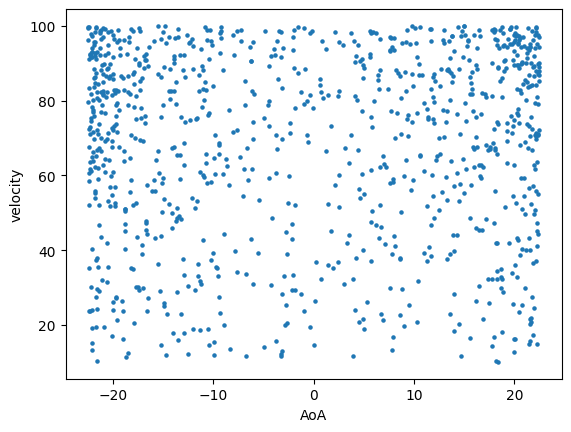

In [3]:
paras=generate_log_random_parameters(1000,path_airfoil_database="./data_generation/airfoil_database/")
plot_ve_AoA(paras,log=False)

* Random parameter set with velocity and AoA following a uniform distribution:

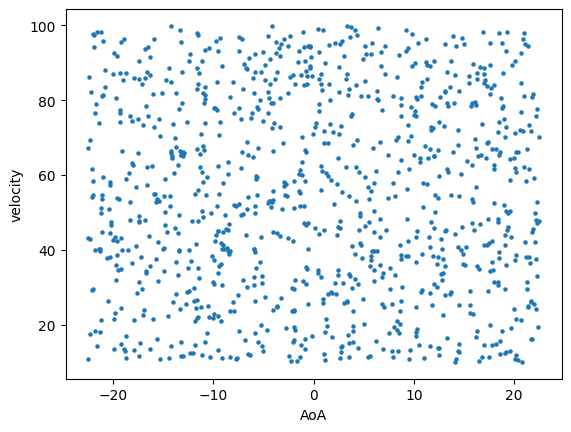

In [4]:
paras=generate_uniform_random_parameters(1000,path_airfoil_database="./data_generation/airfoil_database/")
plot_ve_AoA(paras,log=False)

* Manual parameter set:

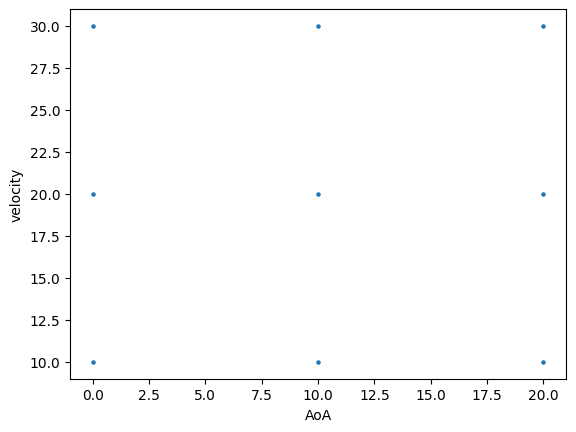

In [13]:
paras=generate_given_parameters(["a18"],[10,20,30],[0,10,20])
plot_ve_AoA(paras,log=False)

Finally, we can use the generated parameter set can to perform the simulations. We provide a function to run the simulation **in parallel** with OpenFOAM (The following code cannot be run in colab because it requires OpenFOAM to be installed. The OpenFOAM version we are currently using is OpenFOAM5. It is possible to use other versions through modifying the script in /data_generation/OpenFOAM.): 

In [15]:
parallel_generator(paras,2,
                   path_OF_case="./data_generation/OpenFOAM/",
                   path_airfoil_database="../data_generation/airfoil_database/",
                   save_dir="./generated_data/"
                   )

The code in the previous cell will perform the simulation and do the post-process in parallel with `2` cpu cores. Several folders and files named "working_case_i" and "process_i.log", where `i` is the index of parallel simulation, will be generated at the same path as the current Jupyter notebook during the simulation. The `working_case_i` is the ith case path for OpenFOAM, and "process_i.log" records the progress of each parallel simulation. The simulations will be backstage so that the code in previous cell will end in a few seconds.  **Also Note that if you want to use a relative path, `path_airfoil_database` should be a relative path with respect to the files in "working_case_i"**. 

The following code can be used to generate the single parameter dataset used in our manuscript. If you don't want to generate it from scratch, you can also directly use the data in the `dataset` folder. In the `process_dataset` notebook, we will showcase how to read and process the dataset.

In [ ]:
paras=generate_given_parameters(["raf30"],[5.0+i*10 for i in range(11)],[20.0])
parallel_generator(paras,
                   2,
                   path_OF_case="./data_generation/OpenFOAM/",
                   path_airfoil_database="../data_generation/airfoil_database/",
                   save_dir="./datasets/1_parameter/data/"
                   )